# Predicting Hotel Booking Cancelation

#### By: Julia Kelman: [GitHub](https://git.generalassemb.ly/julia-kelman/)

## Problem Statement

Over the years, the hotel industry has changed with a majority of bookings now made through third parties such as Booking.com [(source)](https://www.hotelmanagement.net/tech/study-cancelation-rate-at-40-as-otas-push-free-change-policy). Those Online Travel Agengies (OTA) have transformed cancelation policies from a footnote at the bottom of the page to the main selling point in their marketing campaigns [(source)](https://triptease.com/blog/the-real-cost-of-free-cancellations/). As a result, customers have become accustomed to free cancelation policies. In fact, a study conducted by D-Edge Hospitality Solutions found that cancellation rate across all channels has risen by 6% over the past four years, reaching almost 40% in 2018 [(source)](https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/). This increase in booking cancelation makes it harder for hotels to accurately forecast, leading to non-optimized occupancy and revenue loss [(source)](https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/). 

When hotels try to protect themselves by using services such as Booking.com's "Risk Free Reservations", the burden then falls on OTAs. Indeed, this service requires the OTA to pay for the reservation if the booking is canceled and they cannot find a new guest to occupy the room [(source)](https://triptease.com/blog/the-real-cost-of-free-cancellations/). One thing is clear, whether you are a hotel or an OTA, cancelations have an negative financial impact on your business.  

In addition to the direct financial consequences of cancelations, they also cause operational problems. Those problems may lead to decrease customer satisfaction and negative reviews. In a world where more and more customers check online reviews before picking a hotel, those reviews can have major impacts. Indeed, TripAdvisor’s reviews and scores influenced around $546 billion of travel spending during 2017 [(source)](https://www.stayntouch.com/blog/how-online-reviews-impact-hotel-revenue/). At a single hotel level, an increase in online reputation score has been linked to an increase in occupancy and revenue [(source)](https://vtechworks.lib.vt.edu/handle/10919/85353). We can clearly understand why avoiding bad reviews due to a room not being ready when the guest arrives can be very valuable for a business. This requires knowing which booking to prioritize. It is therefore very useful for hotels to know which bookings are likely to get cancelled in order to plan their operations accordingly.

Characteristics of the booking itself may be good indicators of whether or not a booking will be canceled. For instance, the average length of stay of canceled reservations is 65% higher than non-canceled booking, with a lead time of 60 days [(source)](https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/). Engaging with the reasons why people are cancelling and what types of bookings are being canceled is crucial.

In order to solve this problem, we will use a real life hotel booking dataset to create a customer segmentation analysis in order to gain insights about the customers (and hopefully reasons why they cancel their reservation). We will then build a classification model (including the newly created customer clusters) to predict whether or not a booking will be cancelled with the highest accuracy possible.   
This model will allow hotels to predict if a new booking will be cancelled or not, manage their business accordingly, and increase their revenue.   

## Executive Summary

## Table of Contents

- [Loading Data](#Loading-Data)
    - [Library Imports](#Library-Imports)  
    - [Hotel Data Imports](#Hotel-Data-Imports)
    - [Data Dictionary](#Data-Dictionary)
- [Data Cleaning](#Data-Cleaning) 
    - [Feature Format](#Feature-Format)
    - [Missing Data](#Missing-Data)
    - [Data Types](#Data-Types)
- [Exploratory Data Analysis](#EDA)
- [Customer Segmentation](#Customer-Segmentation)
- [Model Preparation](#Model-Preparation)
- [Modeling](#Modeling)  
    - [Baseline Model](#Baseline-Model)  
    - [Logistic Regression](#Logistic-Regression)
    - [kNN](#kNN)  
    - [Naive Bayes](#Naive-Bayes) 
    - [SVM](#SVM)
    - [Decision Trees](#Decision-Trees)
- [Model Selection](#Model-Selection)
- [Model Evaluation](#Model-Evaluation)
    - [Confusion Matrix](#Confusion-Matrix)
    - [Understanding Misclassifications](#Understanding-Misclassifications)
    - [Coefficients Interpretation](#Coefficient-Interpretation)
- [Conclusion & Recommendations](#Conclusion-and-Recommendations)
- [References](#References)

## Loading Data 

### Library Imports

In [575]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import pickle


from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping

RANDOM_STATE = 42

In [284]:
pd.set_option('display.max_columns', None)

### Hotel Data Imports

Data gathered from the [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191).  
The data contains "two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled." 

Loading in data for the first hotel, H1, a resort hotel in the region of Algarve in Portugal. 

In [285]:
h1 = pd.read_csv('../data/H1.csv')
h1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [286]:
h1.shape

(40060, 31)

Loading in data for the second hotel, H2, a hotel in the city of Lisbon in Portugal.

In [287]:
h2 = pd.read_csv('../data/H2.csv')
h2.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [288]:
h2.shape

(79330, 31)

In order to answer our problem statement, we need to combine information from both hotels into one dataframe.  
In order to retain information about which hotel each booking belongs to, we need to add a column recording the hotel associated with the booking. In order to make it easier for modeling later on, the same column `is_h1` will be added to both datasets. Bookings belonging to hotel 1 will have a value of `1` while bookings belonging to hotel 2 will have a value of `0` for this feature. 

In [289]:
# Adding a column to h1 to record that bookings belong to hotel 1:
h1['is_h1'] = 1

# Adding a column to h2 to record that bookings do not belong to hotel 1 (and therefore belong to hotel 2):
h2['is_h1'] = 0

In [290]:
# Combining the two datasets: 
df = pd.concat(objs = [h1, h2], axis = 0)

# Resetting the index
df.reset_index(drop = True, inplace=True)
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,is_h1
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,1


In [291]:
df.shape

(119390, 32)

### Data Dictionary


|**Feature Name**|**Type**|**Description**|
|:---|:---|:---|
|ADR|Float|Average Daily Rate. Calculated by dividing the sum of all lodging transactions by the total number of staying nights.|
|Adults|Integer|Number of adults.|
|Agent|Categorical|ID of the travel agency that made the booking.|
|ArrivalDateDayOfMonth|Integer|Day of the month of the arrival date.|
|ArrivalDateMonth|Categorical|Month of arrival date with 12 categories: “January” to “December”.|
|ArrivalDateWeekNumber|Integer|Week number of the arrival date.|
|ArrivalDateYear|Integer|Year of arrival date.|
|AssignedRoomType|Categorical|Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.|
|Babies|Integer|Number of babies.|
|BookingChanges|Integer|Number of changes/amendments made to the booking from the moment the booking was entered on the Property Management System until the moment of check-in or cancellation. Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date, nights, reserved room type or meal.|
|Children|Integer|Number of children. Sum of both payable and non-payable children.|
|Company|Categorical|ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.|
|Country|Categorical|Country of origin. Categories are represented in the International Standards Organization (ISO) 3155–3:2013 format.|
|CustomerType|Categorical|Type of booking, assuming one of four categories: Contract (when the booking has an allotment or other type of contract associated to it), Group (when the booking is associated to a group), Transient (when the booking is not part of a group or contract, and is not associated to other transient booking), and Transient-party (when the booking is transient, but is associated to at least other transient booking).|
|DaysInWaitingList|Integer|Number of days the booking was in the waiting list before it was confirmed to the customer. Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the Property Management System.|
|DepositType|Categorical|Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit (no deposit was made), Non Refund (a deposit was made in the value of the total stay cost), and Refundable (a deposit was made with a value under the total cost of stay). Value calculated based on the payments identified for the booking in the transaction (TR) table before the booking׳s arrival or cancellation date. In case no payments were found the value is “No Deposit”. If the payment was equal or exceeded the total cost of stay, the value is set as “Non Refund”. Otherwise the value is set as “Refundable”.|
|DistributionChannel|Categorical|Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.|
|IsCanceled|Integer|Value indicating if the booking was canceled (1) or not (0).|
|IsRepeatedGuest|Integer|Value indicating if the booking name was from a repeated guest (1) or not (0). Variable created by verifying if a profile was associated with the booking customer. If so, and if the customer profile creation date was prior to the creation date for the booking on the Property Management System database it was assumed the booking was from a repeated guest.|
|LeadTime|Integer|Number of days that elapsed between the entering date of the booking into the Property Management System and the arrival date. Calculated by subtracting the entering date from the arrival date.|
|MarketSegment|Categotical|Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.|
|Meals|Categorical|Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC (no meal package), BB (Bed & Breakfast), HB (Half board: breakfast and one other meal – usually dinner), and FB (Full board: breakfast, lunch and dinner).|
|PreviousBookingsNotCanceled|Integer|Number of previous bookings not cancelled by the customer prior to the current booking. In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled.|
|PreviousCancellations|Integer|Number of previous bookings that were cancelled by the customer prior to the current booking. In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and canceled.|
|RequiredCarParkingSpaces|Integer|Number of car parking spaces required by the customer.|
|ReservationStatus|Categorical|Reservation last status, assuming one of three categories: Canceled (booking was canceled by the customer), Check-Out (customer has checked in but already departed), No-Show (customer did not check-in and did inform the hotel of the reason why). 
|ReservationStatusDate|Date|Date at which the last status was set. This variable can be used in conjunction with the `ReservationStatus` to understand when was the booking canceled or when did the customer checked-out of the hotel.|
|ReservedRoomType|Categorical|Code of room type reserved. Code is presented instead of designation for anonymity reasons.|
|StaysInWeekendNights|Integer|Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel. Calculated by counting the number of weekend nights from the total number of nights.|
|StaysInWeekNights|Integer|Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel. Calculated by counting the number of week nights from the total number of nights.|
|TotalOfSpecialRequests|Integer|Number of special requests made by the customer (e.g. twin bed or high floor).|

## Data Cleaning

### Feature Format

Using Snake Case (stylized as snake_case) is the Python best practice. However, the dataset was provided using Camel Camel (stylized as CamelCase). We need reformat the names of all feature names into snake case. 

In [292]:
# Creating a function to reformat the feature names:
def camel_to_snake(name):
    name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()
# Function from https://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-snake-case

In [293]:
# Reformating the feature names: 
df.columns = df.columns.map(camel_to_snake)

In [294]:
# removing spaces after meal type 
features = ['meal', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company']
for feature in features: 
    df[feature] = df[feature].str.strip()

### Missing Data 

In [295]:
df.isnull().sum()

is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_type                       0
adr         

In [296]:
df['agent'].replace(to_replace='NULL', value='No Agent', inplace=True)

In [297]:
df['company'].replace(to_replace='NULL', value='No Company', inplace=True)

In [298]:
df[df['children'].isnull()]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_h1
40600,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,No Agent,No Company,0,Transient-Party,12.0,0,1,Canceled,2015-08-01,0
40667,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14,No Company,0,Transient-Party,12.0,0,1,Canceled,2015-08-04,0
40679,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,No Agent,No Company,0,Transient-Party,18.0,0,2,Canceled,2015-08-04,0
41160,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9,No Company,0,Transient-Party,76.5,0,1,Canceled,2015-08-09,0


In [299]:
df.shape

(119390, 32)

In [300]:
df.dropna(subset=['children'], inplace=True)

In [301]:
# replacing null value for country feature with "unknown"
df['country'].fillna("unknown", inplace=True)

In [302]:
df.isnull().sum().sum()

0

### Data Types

In [303]:
df.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                              object
company                           

In [304]:
# children should be int 
# reservationstattusdate should be datetime 

# df['children'] = df['children'].astype(int)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

### Duplicates

In [305]:
df[df.duplicated(keep=False)]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_h1
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,No Company,0,Transient,98.00,0,1,Check-Out,2015-07-03,1
5,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,No Company,0,Transient,98.00,0,1,Check-Out,2015-07-03,1
21,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250,No Company,0,Transient,84.67,0,1,Check-Out,2015-07-07,1
22,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250,No Company,0,Transient,84.67,0,1,Check-Out,2015-07-07,1
39,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250,No Company,0,Transient,137.00,0,1,Check-Out,2015-07-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,No Company,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,0
119353,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,No Company,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,0
119354,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,No Company,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,0
119372,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42,No Company,0,Transient,82.35,0,1,Check-Out,2017-09-04,0


### Feature Engineering

In [306]:
df['arrival_date_full'] = df['arrival_date_year'].astype(str) + "-" + df['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}).astype(str) + "-" + df['arrival_date_day_of_month'].astype(str)
df['arrival_date_full'] = pd.to_datetime(df['arrival_date_full'], format="%Y-%m-%d")

In [307]:
# creating a new feature representing length of stay or how many days before arrival did the customer cancel
df['status_minus_arrival_date'] = np.abs(df['arrival_date_full'] - df['reservation_status_date']).astype(str)
# formating the feature 
def format_lenght(date):
    return date[0]
df['status_minus_arrival_date'] = df['status_minus_arrival_date'].map(format_lenght).astype(int)

## EDA

### Target Variable: Cancelation

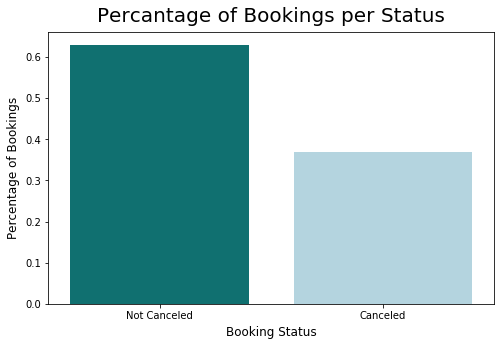

In [308]:
plt.figure(figsize=(8,5)) 
plt.title("Percantage of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'].unique(), y=df['is_canceled'].value_counts(normalize=True), palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

**Interpretation:** Close to 40% of bookings are canceled. This is line with the cancelation numbers reported by the [D-Edge Study](https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/).

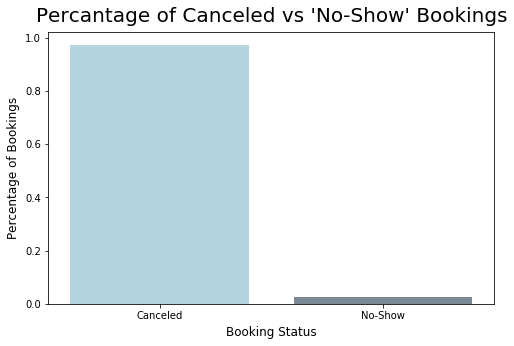

In [309]:
plt.figure(figsize=(8,5)) 
plt.title("Percantage of Canceled vs 'No-Show' Bookings", fontsize = 20, pad = 10)
sns.barplot(x=df[df['is_canceled']==1]['reservation_status'].unique(), y=df[df['is_canceled']==1]['reservation_status'].value_counts(normalize=True), palette=['lightblue', 'lightslategrey'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5);

**Interpretation:** A vast majority of bookings (97%) are canceled prior to arrival. 

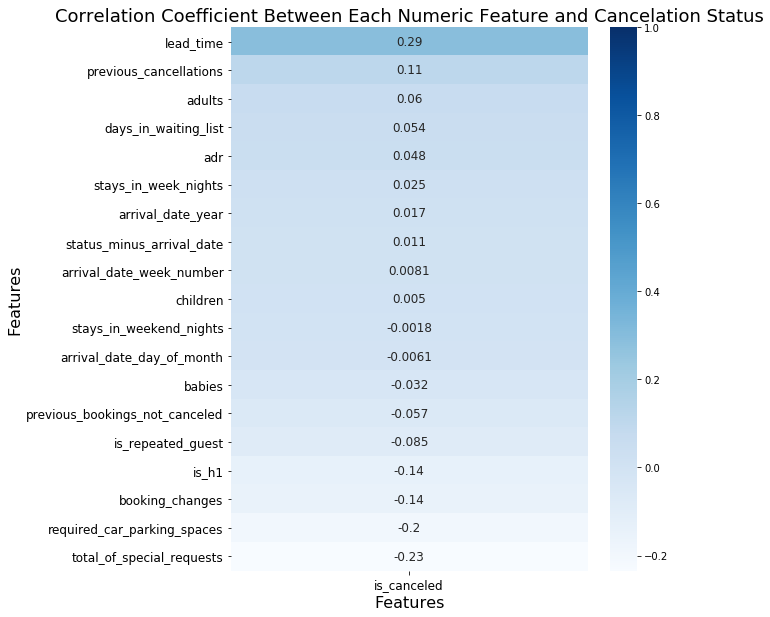

In [310]:
# Visualizing correlation coefficients between features and cancelation
fig = plt.figure(figsize=(8,10))
name = df.columns.str.replace("_"," ").str.capitalize()
ax = sns.heatmap(df.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancelation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

**Interpretation:** 
- `Lead time` is the most highly correlated feature with whether or not a booking is canceled. It makes sense that as the number of days between when the booking is made and the supposed arrival date increases, customers have more time to cancel the reservation and there is more time for an unforeseen circunstance derailing travel plans to arrise. 
- Interestingly, the `total number of special requests` is the second feature with the strongest correlation to our `cancelation` target. As the number of special requests made increases, the likelihood that a booking is canceled decreases. This suggests that engagement with the hotel prior to arrival and feeling like their needs are heard may make a customer less likely to cancel their reservation.
- Interestingly, a customer's prior history with the hotel (measured by the number of `previous bookings not canceled`  or whether or not a customer `is a repeated guest`) does not seem to be highly correlated with whether or not the current booking will be canceled. On the other hand, a customer's prior history or cancelation (measures by the number of `previous cancelations` is more highly correlated with whether or not the current booking will be canceled. 

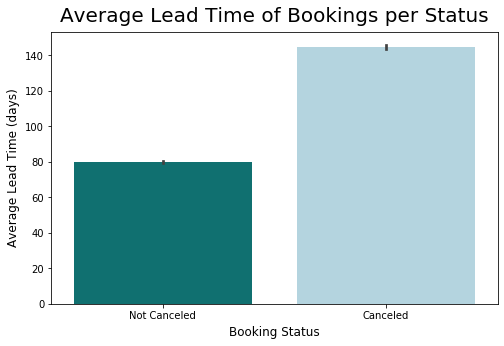

In [311]:
plt.figure(figsize=(8,5)) 
plt.title("Average Lead Time of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['lead_time'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

**Interpretation:** Canceled bookings have a longer lead time on average. 

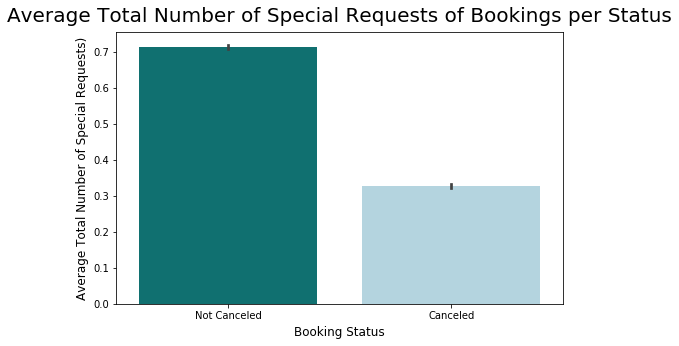

In [312]:
plt.figure(figsize=(8,5)) 
plt.title("Average Total Number of Special Requests of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['total_of_special_requests'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Total Number of Special Requests)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

**Interpretation:** Customers who cancel their bookings make on average fewer special requests. 

In [313]:
# Created a dataframe of canceled booking for plotting purposes
canceled = df[df['is_canceled']==1][['arrival_date_full']]
canceled.set_index('arrival_date_full', inplace=True)
canceled['count'] = 1
canceled=canceled.resample('M').sum()

# Created a dataframe of not canceled booking for plotting purposes
not_canceled = df[df['is_canceled']==0][['arrival_date_full']]
not_canceled.set_index('arrival_date_full', inplace=True)
not_canceled['count'] = 1
not_canceled=not_canceled.resample('M').sum()

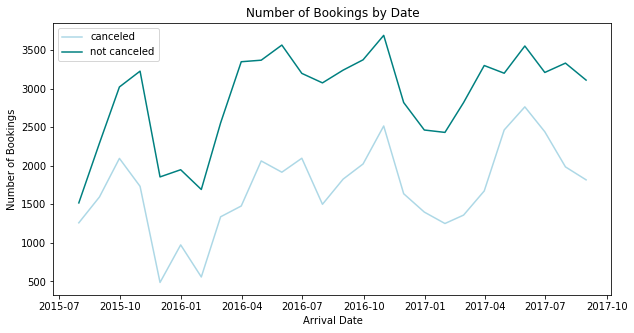

In [314]:
plt.figure(figsize=(10,5))
sns.lineplot(x=canceled.index, y=canceled['count'], color='lightblue')
sns.lineplot(x=not_canceled.index, y=not_canceled['count'], color='teal')
plt.ylabel('Number of Bookings')
plt.xlabel('Arrival Date')
plt.title('Number of Bookings by Date')
plt.legend(['canceled', 'not canceled']);

**Interpretation:** The same pattern can be seen in both canceled and non-canceled bookings. Less bookings are canceled (or kept) around January. More bookings are canceled (and kept) in the warmer months between April and July. 

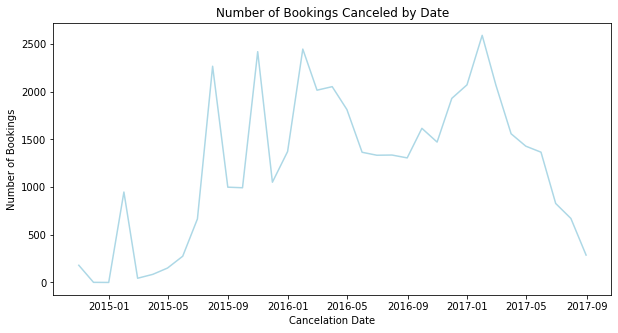

In [315]:
# Created a dataframe of canceled booking for plotting purposes
cancelation_date = df[df['reservation_status']=='Canceled'][['reservation_status_date']]
cancelation_date.set_index('reservation_status_date', inplace=True)
cancelation_date['count'] = 1
cancelation_date=cancelation_date.resample('M').sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=cancelation_date.index, y=cancelation_date['count'], color='lightblue')
plt.ylabel('Number of Bookings')
plt.xlabel('Cancelation Date')
plt.title('Number of Bookings Canceled by Date');

**Interpretation:** when are people canceling? 

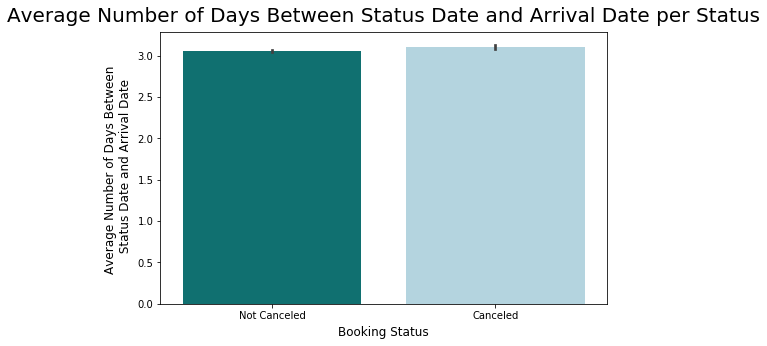

In [316]:
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Days Between Status Date and Arrival Date per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['status_minus_arrival_date'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Days Between \n Status Date and Arrival Date", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

**Interpretation:** 
- On average customers spend 3 nights in the hotel 
- On average, customers cancel 3 days before they supposed arrival date 

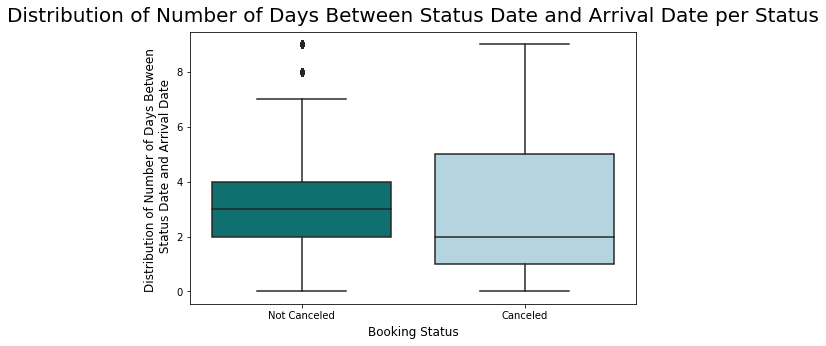

In [317]:
plt.figure(figsize=(8,5)) 
plt.title("Distribution of Number of Days Between Status Date and Arrival Date per Status", fontsize = 20, pad = 10)
sns.boxplot(x=df['is_canceled'], y=df['status_minus_arrival_date'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Distribution of Number of Days Between \n Status Date and Arrival Date", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

In [318]:
# df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
# df['total_nights'].mean()

## Customer Segmentation

### Model Prep

In [319]:
X = df.drop(columns=['is_canceled', 'reservation_status', 'agent', 'company', 'country', 'reservation_status_date', 'arrival_date_full'])

In [320]:
X.shape

(119386, 27)

In [321]:
X.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_h1,status_minus_arrival_date
0,342,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,1,0
1,737,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,1,0
2,7,2015,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,1,1
3,13,2015,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,1,1
4,14,2015,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,1,2


Since our data is a mix of categorial and numeric features, K-prototypes is the most appropriate model to create clusters.

### K-Prototypes

In [120]:
kproto = KPrototypes(n_clusters=2, init='Cao', verbose=2, random_state=RANDOM_STATE, n_jobs=-2)
clusters = kproto.fit_predict(X, categorical=[2, 10, 11, 12, 13, 16, 17, 19, 21, 25])
print(f'cost: {kproto.cost_}')
print(f'iter: {kproto.n_iter_}')

Best run was number 1
cost: 870769012.7799923
iter: 11


In [322]:
kproto = KPrototypes(n_clusters=2, init='Huang', verbose=2, random_state=RANDOM_STATE, n_jobs=-1)
clusters = kproto.fit_predict(X, categorical=[2, 10, 11, 12, 13, 16, 17, 19, 21, 25])
print(f'cost: {kproto.cost_}')
print(f'iter: {kproto.n_iter_}')

Best run was number 3
cost: 870769012.7799917
iter: 11


In [324]:
kproto_scores = []
for n in range(3, 6):
    #do the clustering 
    kproto = KPrototypes(n_clusters=n, init='Huang', verbose=0, random_state=RANDOM_STATE, n_jobs=-1)
    clusters = kproto.fit_predict(X, categorical=[2, 10, 11, 12, 13, 16, 17, 19, 21, 25])
    print(f'cost: {kproto.cost_}')
    print(f'iter: {kproto.n_iter_}')
    
    # get cost 
    cost = kproto.cost_
    
    #gather them
    kproto_scores.append((n, cost))

cost: 647695770.6494106
iter: 20
cost: 522850049.57898057
iter: 12
cost: 458967739.3715904
iter: 29


In [577]:
pickle.dump(kproto, open('kproto.p', 'wb'))

In [352]:
kproto_costs = [(2, 870769012.7799917)] 
for tupl in kproto_scores:
    kproto_costs.append(tupl)

In [354]:
kproto_costs_df = pd.DataFrame(kproto_costs, columns=['n', 'cost'])
kproto_costs_df

,n,cost
0,2,8.707690e+08
1,3,6.476958e+08
2,4,5.228500e+08
3,5,4.589677e+08


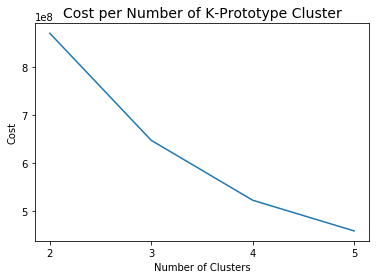

In [364]:
plt.plot(kproto_costs_df['n'], kproto_costs_df['cost'])
plt.xticks([2,3,4,5])
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Cost per Number of K-Prototype Cluster', size=14);

### Model Preparation

In [376]:
df = pd.get_dummies(df, columns=['arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'])

In [377]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_h1,arrival_date_full,status_minus_arrival_date,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,27,1,0,0,2,0.0,0,PRT,0,0,0,3,No Agent,No Company,0,0.0,0,0,Check-Out,2015-07-01,1,2015-07-01,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,27,1,0,0,2,0.0,0,PRT,0,0,0,4,No Agent,No Company,0,0.0,0,0,Check-Out,2015-07-01,1,2015-07-01,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,27,1,0,1,1,0.0,0,GBR,0,0,0,0,No Agent,No Company,0,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,13,2015,27,1,0,1,1,0.0,0,GBR,0,0,0,0,304,No Company,0,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,14,2015,27,1,0,2,2,0.0,0,GBR,0,0,0,0,240,No Company,0,98.0,0,1,Check-Out,2015-07-03,1,2015-07-01,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [378]:
df = df.sample(12000)

In [379]:
X = df.drop(columns=['is_canceled','reservation_status', 'agent', 'company', 'country', 'reservation_status_date', 'arrival_date_full'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, stratify=y)

## Modeling

### Baseline Model

In [380]:
# Checking baseline model score 
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print(f'Baseline Training Score: {dummy.score(X_train, y_train)}')
print(f'Baseline Testing Score: {dummy.score(X_test, y_test)}')

Baseline Training Score: 0.6297777777777778
Baseline Testing Score: 0.63


**Interpretation:** If we always predicted the majority class (Not canceled), our "model" would have a 63% accuracy. 

### Logistic Regression

In [141]:
# Construct Grid Parameters
lg_params = {
    'penalty': ['l1', 'l2'], 
    'C': [0.05, 3, 3.5, 4],
    'max_iter': [100]
}

# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=RANDOM_STATE),
                 lg_params,
                 cv = 5,
                 scoring = 'accuracy')
lg = lg_gs.fit(X_train, y_train)

In [142]:
# Scoring 
print(f'Best Training Accuracy: {lg.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {lg.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(lg.best_estimator_, X, y).mean()}')

Best Training Accuracy: 0.8147777777777778
Best Testing Accuracy: 0.82
Cross-val-score: 0.8158333333333333


In [143]:
lg.best_params_

{'C': 3.5, 'max_iter': 100, 'penalty': 'l1'}

**Interpretation:** This model is not overfit or underfit (the training and testing scores are close together). The model is outperforming the baseline with a **testing accuracy of 81%**.   
Note: More parameters than the ones appearing above were investigated during our search for the best model. However, in order to decrease runtime, only the parametters giving us the best test score (identified using `.best_params_`) were included in this notebook. 

In [576]:
pickle.dump(lg, open('logreg.p', 'wb'))

### kNN

In [154]:
#Creating pipeline for kNN: 

# Define Pipeline
pipe = Pipeline(steps = [
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier()) 
])

# Construct Grid Parameters
hyperparams = {
    'knn__n_neighbors': [9, 10, 11], 
    'knn__metric': ['minkowski', 'manhattan', 'euclidean'],
    'knn__weights': ['uniform', 'distance']
}

# Perform Grid Search
knn_gs = GridSearchCV(pipe,
                 param_grid=hyperparams,
                 cv = 5,
                 scoring = 'accuracy')
knn = knn_gs.fit(X_train, y_train)

In [155]:
# Scoring 
print(f'Best Training Accuracy: {knn.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {knn.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(knn.best_estimator_, X, y).mean()}')

Best Training Accuracy: 0.9994444444444445
Best Testing Accuracy: 0.8103333333333333
Cross-val-score: 0.8206666666666667


In [156]:
knn.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 10,
 'knn__weights': 'distance'}

In [578]:
pickle.dump(knn, open('knn.p', 'wb'))

### Naive Bayes 

In [404]:
# Construct Grid Parameters
gnb_params = {
    'var_smoothing': [1e-4, 1e-5, 1e-6],
    'priors':[None, [0.6, 0.4]]
}

# Perform Grid Search
gnb_gs = GridSearchCV(GaussianNB(),
                 gnb_params,
                 cv = 5,
                 scoring = 'accuracy')
gnb = gnb_gs.fit(X_train, y_train)

In [405]:
# Scoring 
print(f'Best Training Accuracy: {gnb.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {gnb.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(gnb.best_estimator_, X, y).mean()}')

Best Training Accuracy: 0.7743333333333333
Best Testing Accuracy: 0.7786666666666666
Cross-val-score: 0.7620000000000001


In [406]:
gnb.best_params_

{'priors': None, 'var_smoothing': 1e-05}

In [579]:
pickle.dump(gnb, open('gnaivebayes.p', 'wb'))

### SVM

In [421]:
# Construct Grid Parameters
svm_params = {
    'C':[2],
    'kernel': ['linear'],
}

# Perform Grid Search
svm_gs = GridSearchCV(SVC(random_state=RANDOM_STATE),
                 svm_params,
                 cv = 5,
                 scoring = 'accuracy')
svm = svm_gs.fit(X_train, y_train)

In [422]:
# Scoring 
print(f'Best Training Accuracy: {svm.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {svm.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(svm.best_estimator_, X, y).mean()}')

Best Training Accuracy: 0.8002222222222222
Best Testing Accuracy: 0.7983333333333333
Cross-val-score: 0.79975


In [423]:
svm.best_params_

{'C': 2, 'kernel': 'linear'}

In [580]:
pickle.dump(svm, open('svm.p', 'wb'))

### Decision Trees

In [466]:
# Construct Grid Parameters
dt_params = {
    'max_depth':[None, 10, 50],
    'max_features' : [None, 0.60, 0.7, 0.80] ,
    'min_samples_split': [15, 20, 25, 30], 
    'min_samples_leaf': [1]
}

# Perform Grid Search
dt_gs = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE),
                 dt_params,
                 cv = 5,
                 scoring = 'accuracy')
dt = dt_gs.fit(X_train, y_train)

In [467]:
# Scoring 
print(f'Best Training Accuracy: {dt.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {dt.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(dt.best_estimator_, X, y).mean()}')

Best Training Accuracy: 0.9395555555555556
Best Testing Accuracy: 0.8936666666666667
Cross-val-score: 0.8864166666666666


In [468]:
dt.best_params_

{'max_depth': None,
 'max_features': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 25}

In [581]:
pickle.dump(dt, open('dtree.p', 'wb'))

### Bagging Classifier

In [542]:
# Construct Grid Parameters
bc_params = {
    'n_estimators': [40, 45, 50], 
    'max_features': [0.75, 0.8, 0.85]
}

# Perform Grid Search
bc_gs = GridSearchCV(BaggingClassifier(random_state=RANDOM_STATE),
                 bc_params,
                 cv = 5,
                 scoring = 'accuracy')
bc = bc_gs.fit(X_train, y_train)

In [543]:
# Scoring 
print(f'Best Training Accuracy: {bc.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {bc.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(bc.best_estimator_, X, y).mean()}')

Best Training Accuracy: 0.9994444444444445
Best Testing Accuracy: 0.9266666666666666
Cross-val-score: 0.9350000000000002


In [544]:
bc.best_params_

{'max_features': 0.8, 'n_estimators': 45}

In [582]:
pickle.dump(bc, open('bagclass.p', 'wb'))

### Random Forest

In [572]:
# Construct Grid Parameters
rf_params = {
    'n_estimators': [150, 160, 170],  
    'max_features': [50],
    'max_depth': [11, 12, 13]
}

# Perform Grid Search
rf_gs = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE),
                 rf_params,
                 cv = 5,
                 scoring = 'accuracy')
rf = rf_gs.fit(X_train, y_train)

In [573]:
# Scoring 
print(f'Best Training Accuracy: {rf.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {rf.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(rf.best_estimator_, X, y).mean()}')

Best Training Accuracy: 0.9342222222222222
Best Testing Accuracy: 0.8996666666666666
Cross-val-score: 0.9040000000000001


In [574]:
rf.best_params_

{'max_depth': 13, 'max_features': 50, 'n_estimators': 150}

In [583]:
pickle.dump(rf, open('randomforest.p', 'wb'))

### Extra Trees

In [539]:
# Construct Grid Parameters
et_params = {
    'n_estimators': [150], 
    'max_features': [10, 20, 50],
    'max_depth': [3, 5, 7]
}

# Perform Grid Search
et_gs = GridSearchCV(ExtraTreesClassifier(random_state=RANDOM_STATE),
                 et_params,
                 cv = 5,
                 scoring = 'accuracy')
et = et_gs.fit(X_train, y_train)

In [540]:
# Scoring 
print(f'Best Training Accuracy: {et.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {et.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(et.best_estimator_, X, y).mean()}')

Best Training Accuracy: 0.8453333333333334
Best Testing Accuracy: 0.834
Cross-val-score: 0.82675


In [541]:
et.best_params_

{'max_depth': 7, 'max_features': 50, 'n_estimators': 150}

In [584]:
pickle.dump(et, open('extratree.p', 'wb'))

### Neural Networks

In [490]:
X.shape

(12000, 77)

In [495]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(77,)))
model.add(Dropout(0.18))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation='sigmoid'))
es = EarlyStopping(monitor='val_loss', patience=5) 

# Compile model
model.compile(loss='bce',
              optimizer='adam',
              metrics=['binary_accuracy'])

# Fitting the model
history = model.fit(X_train_sc,
                    y_train, 
                    batch_size = 256,
                    validation_data =(X_test_sc, y_test),
                    epochs = 500,
                    verbose = 0,
                    callbacks=[es])

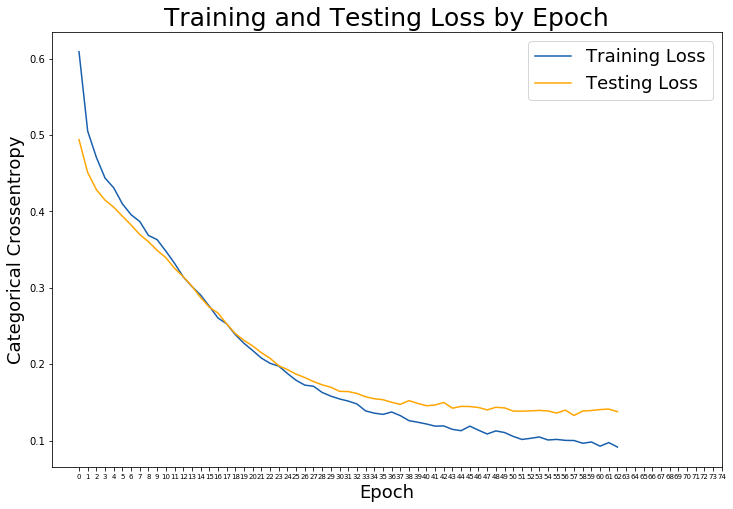

In [496]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(75), np.arange(75), size=7)

plt.legend(fontsize = 18);

# Credit to GA CNN global lecture author for the graph code 

In [497]:
# Evaluate model on test data.
score = model.evaluate(X_test_sc,
                       y_test,
                       verbose=1)

labels = model.metrics_names
# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

94/94 [==============================] - 0s 5ms/step - loss: 0.1378 - binary_accuracy: 0.9583
loss: 0.13776139914989471
binary_accuracy: 0.9583333134651184


In [587]:
pickle.dump(model, open('NN.p', 'wb'))

TypeError: can't pickle _thread.RLock objects

## Model Selection

## Model Evaluation

### Confusion Matrix

### Understanding Misclassifications

### Coefficients Interpretation

## Conclusion & Recommentations

## Refererences

- [The Real Cost of Free Cancellations](https://triptease.com/blog/the-real-cost-of-free-cancellations/)     
- [Cancelation Rate at 40% as OTAs Push Free Change Policy](https://www.hotelmanagement.net/tech/study-cancelation-rate-at-40-as-otas-push-free-change-policy)
- [D-Edge Study: How Online Hotel Distribution is Changing in Europe](https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/) 
- [How Online reviews Impact Hotel Revenue](https://www.stayntouch.com/blog/how-online-reviews-impact-hotel-revenue/)
- [The Impact of Social Media on Lodging Performance](https://vtechworks.lib.vt.edu/handle/10919/85353)
- [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191)